In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
%matplotlib notebook

In [2]:
ogdata = pd.read_csv('nbaNew.csv')

In [3]:
ogdata.head(10)

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,8035.0,1986.0,A.C. Green,NaN,PF,22.0,LAL,82.0,1.0,1542.0,...,61.10%,160.0,221.0,381.0,54.0,49.0,49.0,99.0,229.0,521.0
1,8420.0,1987.0,A.C. Green,NaN,PF,23.0,LAL,79.0,72.0,2240.0,...,78.00%,210.0,405.0,615.0,84.0,70.0,80.0,102.0,171.0,852.0
2,8807.0,1988.0,A.C. Green,NaN,PF,24.0,LAL,82.0,64.0,2636.0,...,77.30%,245.0,465.0,710.0,93.0,87.0,45.0,120.0,204.0,937.0
3,9242.0,1989.0,A.C. Green,NaN,PF,25.0,LAL,82.0,82.0,2510.0,...,78.60%,258.0,481.0,739.0,103.0,94.0,55.0,119.0,172.0,1088.0
4,9688.0,1990.0,A.C. Green,"$1,750,000.00",PF,26.0,LAL,82.0,82.0,2709.0,...,75.10%,262.0,450.0,712.0,90.0,66.0,50.0,116.0,207.0,1061.0
5,10166.0,1991.0,A.C. Green,"$1,750,000.00",PF,27.0,LAL,82.0,21.0,2164.0,...,73.80%,201.0,315.0,516.0,71.0,59.0,23.0,99.0,117.0,750.0
6,10617.0,1992.0,A.C. Green,"$1,750,000.00",PF,28.0,LAL,82.0,53.0,2902.0,...,74.40%,306.0,456.0,762.0,117.0,91.0,36.0,111.0,141.0,1116.0
7,11060.0,1993.0,A.C. Green,"$1,885,000.00",PF,29.0,LAL,82.0,55.0,2819.0,...,73.90%,287.0,424.0,711.0,116.0,88.0,39.0,116.0,149.0,1051.0
8,11529.0,1994.0,A.C. Green,"$6,472,600.00",PF,30.0,PHO,82.0,55.0,2825.0,...,73.50%,275.0,478.0,753.0,137.0,70.0,38.0,100.0,142.0,1204.0
9,11999.0,1995.0,A.C. Green,"$6,473,000.00",SF,31.0,PHO,82.0,52.0,2687.0,...,73.20%,194.0,475.0,669.0,127.0,55.0,31.0,114.0,146.0,916.0


In [4]:
data2000plus = ogdata[ogdata["SeasonStart"] >= 2000]
realplayers = data2000plus[data2000plus["MP"] >= 1000]

In [5]:
realplayers.head(10)

,#,SeasonStart,PlayerName,PlayerSalary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16,14648.0,2000.0,A.C. Green,"$2,250,000.00",PF,36.0,LAL,82.0,82.0,1929.0,...,69.50%,160.0,326.0,486.0,80.0,53.0,18.0,53.0,127.0,413.0
17,15148.0,2001.0,A.C. Green,NaN,PF,37.0,MIA,82.0,1.0,1411.0,...,71.20%,107.0,206.0,313.0,39.0,30.0,8.0,45.0,119.0,367.0
28,22100.0,2013.0,A.J. Price,NaN,PG,26.0,WAS,57.0,22.0,1278.0,...,79.00%,20.0,94.0,114.0,205.0,33.0,3.0,64.0,73.0,441.0
37,19415.0,2009.0,Aaron Brooks,"$1,118,520.00",PG,24.0,HOU,80.0,35.0,1998.0,...,86.60%,33.0,124.0,157.0,238.0,46.0,8.0,125.0,152.0,894.0
38,19996.0,2010.0,Aaron Brooks,NaN,PG,25.0,HOU,82.0,82.0,2919.0,...,82.20%,54.0,161.0,215.0,434.0,69.0,14.0,232.0,199.0,1604.0
39,20592.0,2011.0,Aaron Brooks,NaN,PG,26.0,TOT,59.0,12.0,1284.0,...,88.60%,20.0,58.0,78.0,233.0,34.0,3.0,99.0,115.0,634.0
45,22337.0,2014.0,Aaron Brooks,NaN,PG,29.0,TOT,72.0,12.0,1557.0,...,87.40%,43.0,97.0,140.0,233.0,52.0,13.0,117.0,146.0,645.0
48,22939.0,2015.0,Aaron Brooks,"$2,000,000.00",PG,30.0,CHI,82.0,21.0,1885.0,...,83.30%,32.0,134.0,166.0,261.0,54.0,15.0,157.0,189.0,954.0
49,23582.0,2016.0,Aaron Brooks,"$2,700,000.00",PG,31.0,CHI,69.0,0.0,1108.0,...,76.60%,21.0,80.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0
52,23698.0,2016.0,Aaron Gordon,"$4,351,320.00",PF,20.0,ORL,78.0,37.0,1863.0,...,66.80%,154.0,353.0,507.0,128.0,59.0,55.0,66.0,153.0,719.0


In [6]:
realplayers.keys()

Index(['#', 'SeasonStart', 'PlayerName', 'PlayerSalary ', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS',
       'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:

neededData =  {
    "Name": realplayers["PlayerName"],
    "Points": realplayers["PTS"]/(realplayers["MP"]*1000),
    "Assists": realplayers["AST"]/(realplayers["MP"]*1000),
    "OffensiveRebounds": realplayers["ORB"]/(realplayers["MP"]*1000),
    "Position": realplayers["Pos"],
    "Season": realplayers["SeasonStart"]
}

In [8]:
neededDf = pd.DataFrame(neededData)

In [9]:
neededDf.head(10)

,Name,Points,Assists,OffensiveRebounds,Position,Season
16,A.C. Green,0.000214,0.000041,0.000083,PF,2000.0
17,A.C. Green,0.000260,0.000028,0.000076,PF,2001.0
28,A.J. Price,0.000345,0.000160,0.000016,PG,2013.0
37,Aaron Brooks,0.000447,0.000119,0.000017,PG,2009.0
38,Aaron Brooks,0.000550,0.000149,0.000018,PG,2010.0
39,Aaron Brooks,0.000494,0.000181,0.000016,PG,2011.0
45,Aaron Brooks,0.000414,0.000150,0.000028,PG,2014.0
48,Aaron Brooks,0.000506,0.000138,0.000017,PG,2015.0
49,Aaron Brooks,0.000443,0.000162,0.000019,PG,2016.0
52,Aaron Gordon,0.000386,0.000069,0.000083,PF,2016.0


In [10]:
#neededDf.to_csv('cleantData.csv')

In [11]:
df = neededDf

In [12]:
PFdf = neededDf[neededDf["Position"]=="PF"]

In [13]:
PFdf.head(10)

,Name,Points,Assists,OffensiveRebounds,Position,Season
16,A.C. Green,0.000214,0.000041,0.000083,PF,2000.0
17,A.C. Green,0.000260,0.000028,0.000076,PF,2001.0
52,Aaron Gordon,0.000386,0.000069,0.000083,PF,2016.0
98,Aaron Williams,0.000399,0.000038,0.000103,PF,2000.0
99,Aaron Williams,0.000359,0.000038,0.000090,PF,2001.0
100,Aaron Williams,0.000383,0.000050,0.000074,PF,2002.0
140,Adam Morrison,0.000394,0.000070,0.000023,PF,2007.0
273,Al Harrington,0.000310,0.000069,0.000063,PF,2001.0
274,Al Harrington,0.000439,0.000041,0.000073,PF,2002.0
276,Al Harrington,0.000429,0.000054,0.000067,PF,2004.0


In [14]:
import sklearn.preprocessing as prepro

In [15]:
def normalize(arr):
    maxv = max(arr)
    minv = min(arr)
    diff = maxv-minv
    for index,num in enumerate(arr):
        arr[index] = (num - minv)/(diff)
    return arr

In [16]:
normalizedp = normalize(np.array(PFdf["Points"]))
normalizedr = normalize(np.array(PFdf["OffensiveRebounds"]))
normalizeda = normalize(np.array(PFdf["Assists"]))

In [17]:
PFdf = PFdf.assign(Points = normalizedp)
PFdf = PFdf.assign(OffensiveRebounds = normalizedr)
PFdf = PFdf.assign(Assists = normalizeda)

In [18]:
PFdf.head(10)


,Name,Points,Assists,OffensiveRebounds,Position,Season
16,A.C. Green,0.179569,0.162934,0.563193,PF,2000.0
17,A.C. Green,0.247024,0.096479,0.509155,PF,2001.0
52,Aaron Gordon,0.431557,0.293777,0.561049,PF,2016.0
98,Aaron Williams,0.450282,0.144044,0.714916,PF,2000.0
99,Aaron Williams,0.391664,0.144673,0.619274,PF,2001.0
100,Aaron Williams,0.427139,0.202972,0.498159,PF,2002.0
140,Adam Morrison,0.443732,0.300364,0.109357,PF,2007.0
273,Al Harrington,0.319797,0.293796,0.410861,PF,2001.0
274,Al Harrington,0.508917,0.161276,0.488505,PF,2002.0
276,Al Harrington,0.495195,0.221520,0.440339,PF,2004.0


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


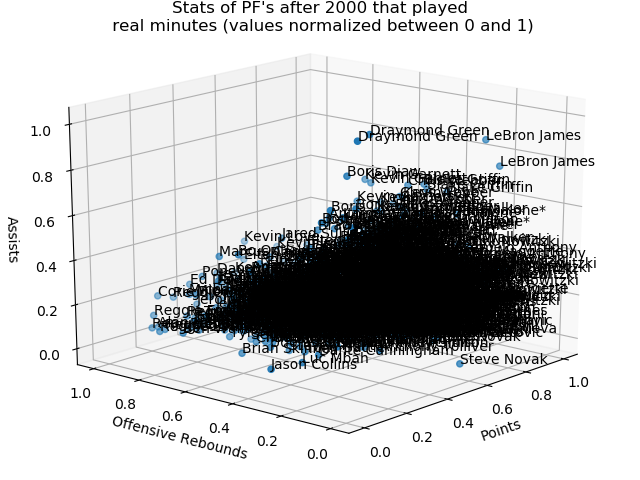

In [22]:
X = [x for x in PFdf["Points"]]
Y = [x for x in PFdf["OffensiveRebounds"]]
Z = [x for x in PFdf["Assists"]]


fig = plt.figure()
ax = Axes3D(fig)



ax.scatter(X, Y, Z)
ax.set_xlabel("Points")
ax.set_ylabel("Offensive Rebounds")
ax.set_zlabel("Assists")
ax.set_title("Stats of PF's after 2000 that played\n real minutes (values normalized between 0 and 1)")

for X,Y,Z,name in zip(X,Y,Z,PFdf["Name"]):
    ax.text(X,Y,Z,name)

plt.show()
